In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

FILE = Path("circuits.csv")
df = pd.read_csv(FILE)

# ensure numeric lat/long
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['long'] = pd.to_numeric(df['long'], errors='coerce')

print("Loaded", df.shape, "rows; columns:", list(df.columns))
df.head()


Loaded (77, 6) rows; columns: ['circuit_id', 'name', 'lat', 'long', 'locality', 'country']


,circuit_id,name,lat,long,locality,country
0,silverstone,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK
1,monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco
2,indianapolis,Indianapolis Motor Speedway,39.7950,-86.23470,Indianapolis,USA
3,bremgarten,Circuit Bremgarten,46.9589,7.40194,Bern,Switzerland
4,spa,Circuit de Spa-Francorchamps,50.4372,5.97139,Spa,Belgium


In [6]:
# Q1
avg_lat = df['lat'].mean()
print(f"Average latitude of all circuits: {avg_lat:.6f} degrees")


Average latitude of all circuits: 33.442925 degrees


Longitude descriptive statistics:
 count     77.000000
mean       1.076683
std       65.516951
min     -118.189000
25%       -9.394170
50%        3.930830
75%       19.248600
max      144.968000
Name: long, dtype: float64


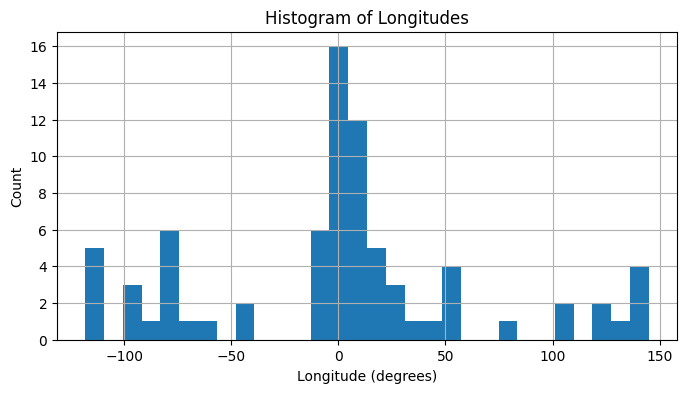

In [7]:
# Q2: descriptive stats + histogram
lng_desc = df['long'].describe()
print("Longitude descriptive statistics:\n", lng_desc)

# Histogram
plt.figure(figsize=(8,4))
plt.hist(df['long'].dropna(), bins=30)
plt.title("Histogram of Longitudes")
plt.xlabel("Longitude (degrees)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [8]:
# Q3
country_counts = df['country'].value_counts(dropna=True)
top_country = country_counts.idxmax()
top_country_count = int(country_counts.max())
print(f"Country with the highest number of circuits: {top_country} ({top_country_count} circuits)")
# optionally show top 10
country_counts.head(10)


Country with the highest number of circuits: USA (12 circuits)


country
USA         12
France       7
Spain        6
UK           4
Portugal     4
Italy        4
Japan        3
Germany      3
Canada       3
Belgium      3
Name: count, dtype: int64

In [9]:
# Q4
# If you have a continent column, use it. Otherwise we match country names to a Europe set.
europe_countries = {
    "albania","andorra","armenia","austria","azerbaijan","belarus","belgium","bosnia and herzegovina",
    "bulgaria","croatia","cyprus","czech republic","denmark","estonia","finland","france","georgia",
    "germany","greece","hungary","iceland","ireland","italy","kazakhstan","kosovo","latvia","liechtenstein",
    "lithuania","luxembourg","malta","moldova","monaco","montenegro","netherlands","north macedonia","norway",
    "poland","portugal","romania","russia","san marino","serbia","slovakia","slovenia","spain","sweden","switzerland",
    "turkey","ukraine","united kingdom","uk","vatican city","slovak republic"
}

mask_eu = df['country'].astype(str).str.lower().isin(europe_countries)
eu_count = mask_eu.sum()
if eu_count == 0:
    print("No circuits matched the Europe country list; check your country column or continent data.")
else:
    europe_median = df.loc[mask_eu, 'lat'].median()
    print(f"Median latitude for circuits in Europe (n={eu_count}): {europe_median:.6f} degrees")


Median latitude for circuits in Europe (n=41): 46.864200 degrees


In [10]:
# Q6
min_lat = df['lat'].min()
max_lat = df['lat'].max()
lat_range = max_lat - min_lat
print(f"Latitude range: min={min_lat:.6f}, max={max_lat:.6f}, range={lat_range:.6f} degrees")


Latitude range: min=-37.849700, max=57.265300, range=95.115000 degrees


In [11]:
# Q7
north_count = int((df['lat'] > 0).sum())
south_count = int((df['lat'] < 0).sum())
equator_count = int((df['lat'] == 0).sum())
total = len(df)
print(f"Northern hemisphere: {north_count}")
print(f"Southern hemisphere: {south_count}")
print(f"On equator: {equator_count}")
print(f"Total rows: {total}")


Northern hemisphere: 70
Southern hemisphere: 7
On equator: 0
Total rows: 77


In [12]:
# Q8: sample variance (ddof=1)
lng_var_sample = df['long'].dropna().var(ddof=1)
lng_var_population = df['long'].dropna().var(ddof=0)
print(f"Longitude sample variance (ddof=1): {lng_var_sample}")
print(f"Longitude population variance (ddof=0): {lng_var_population}")


Longitude sample variance (ddof=1): 4292.4708294612155
Longitude population variance (ddof=0): 4236.724455052628


In [13]:
# Q10
locality_counts = df['locality'].value_counts(dropna=True)
top_locality = locality_counts.idxmax()
top_count = int(locality_counts.max())
prop = top_count / len(df)
print(f"Most frequent locality: '{top_locality}' with {top_count} occurrences, representing {prop:.2%} of dataset")
# show top 10 localities
locality_counts.head(10)


Most frequent locality: 'Barcelona' with 2 occurrences, representing 2.60% of dataset


locality
Barcelona       2
California      2
Monte-Carlo     1
Indianapolis    1
Bern            1
Reims           1
Spa             1
Monza           1
Nürburg         1
Rouen           1
Name: count, dtype: int64